In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import pandas as pd
import seaborn as sns

import viztsne

In [4]:
plt.style.use(["science", "ieee"])
plt.rcParams["ytick.right"] = False
plt.rcParams["xtick.top"] = False
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.4
plt.rcParams["legend.columnspacing"] = 1.0

In [5]:
from braindecode.datasets import MOABBDataset
data = MOABBDataset("BNCI2014001", subject_ids=[1])
from braindecode import preprocessing
epochs = preprocessing.create_windows_from_events(
    data, trial_start_offset_samples=round(2), preload=True
)
epochs.split('session')["session_T"].datasets[0].windows.event_id

{'feet': 0, 'left_hand': 1, 'right_hand': 2, 'tongue': 3}

In [6]:
# feet, LH, RH, tongue
X, Y = viztsne.load_data("BNCI2014001", 1, preprocess=True)

BNCI2014001 1 (576, 22, 576) -0.00010900231 0.97095364


In [7]:
transformed_data = viztsne.get_transformed_data(X, Y)

# Join
X_all = np.concatenate([X for X, _ in transformed_data.values()])
Y_all = np.concatenate([Y for _, Y in transformed_data.values()])
N = []
for transform_name in transformed_data.keys():
    N.extend([transform_name] * len(X))
N = np.array(N)

pair_dist = viztsne.calculate_pair_dist(X_all)

In [8]:
X_tsne = viztsne.tsne(pair_dist, dim=2, random_state=42)

c:\Users\Work\miniconda3\envs\bci\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Work\miniconda3\envs\bci\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


None
amplitude-perturbation-15
emd
gaussian
sliding-recombination
sliding-window-x
stft-recombination


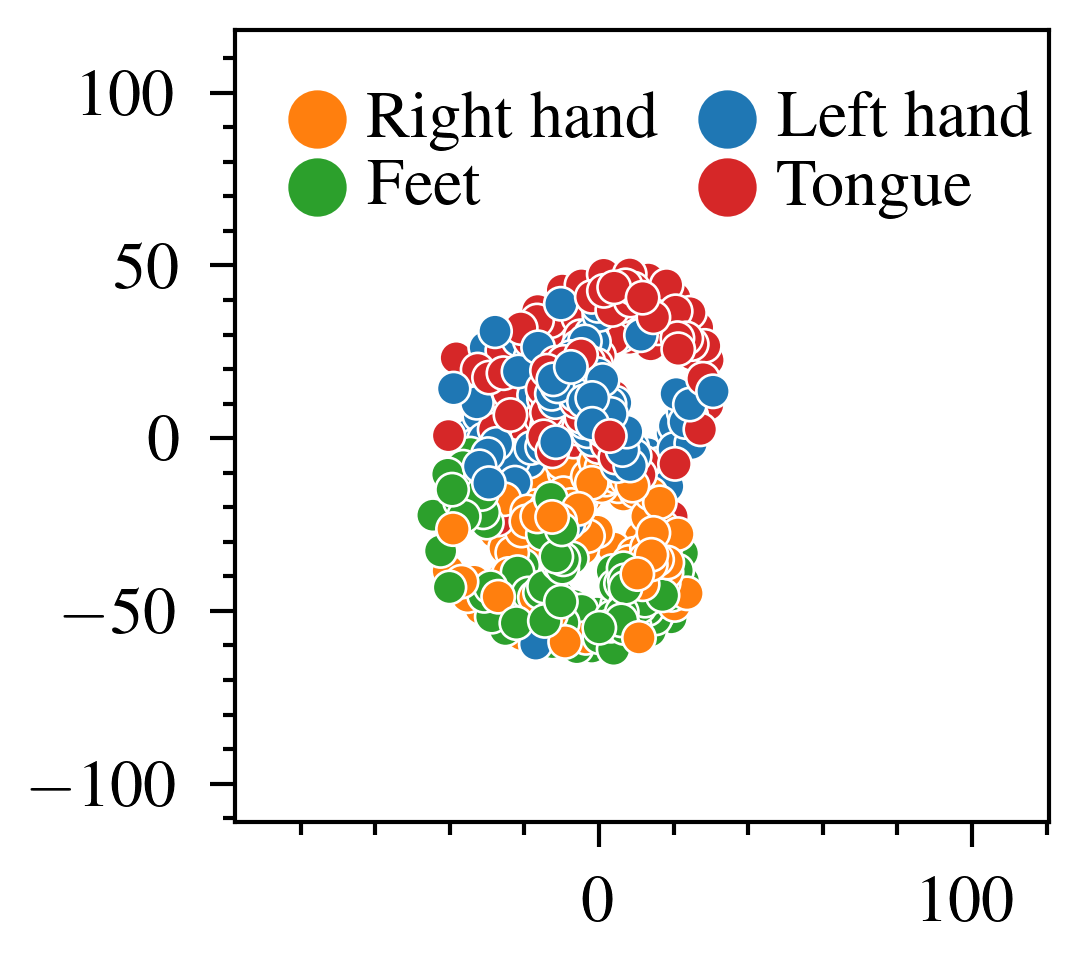

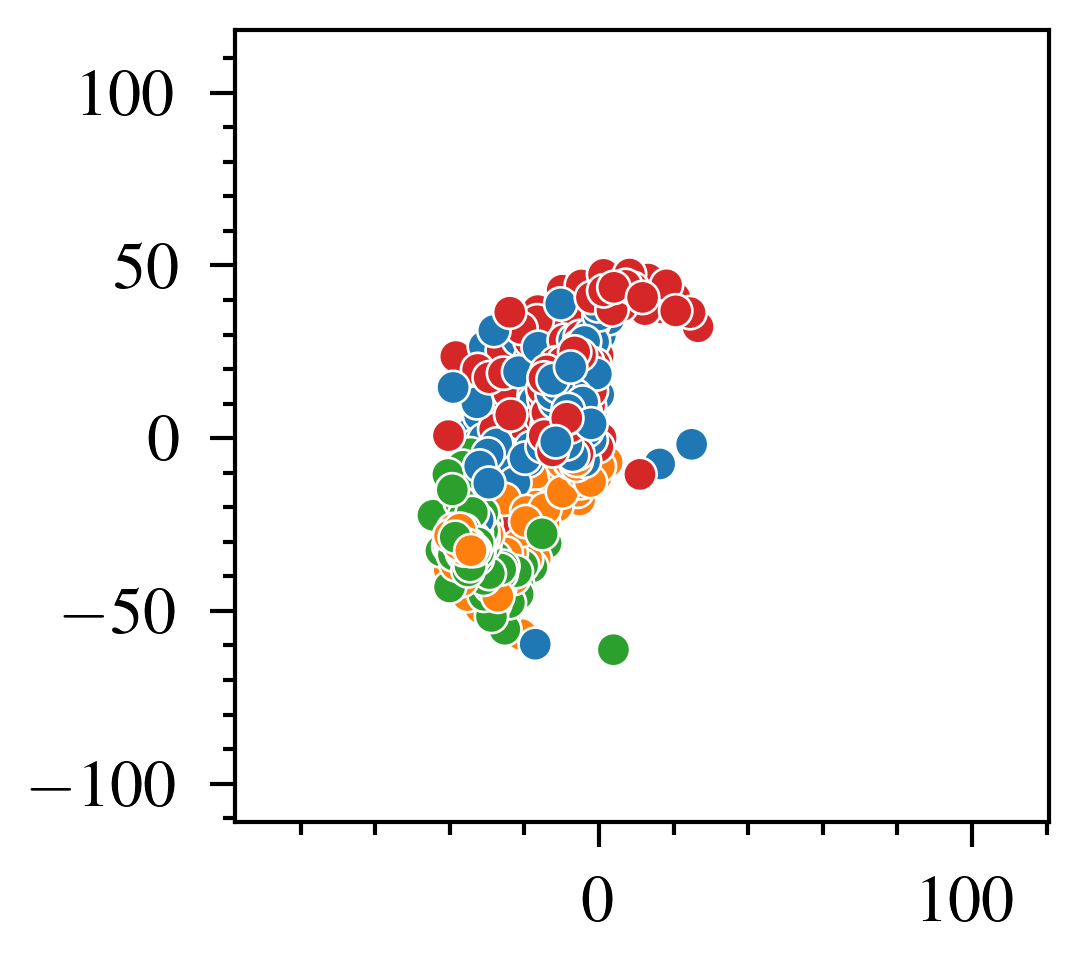

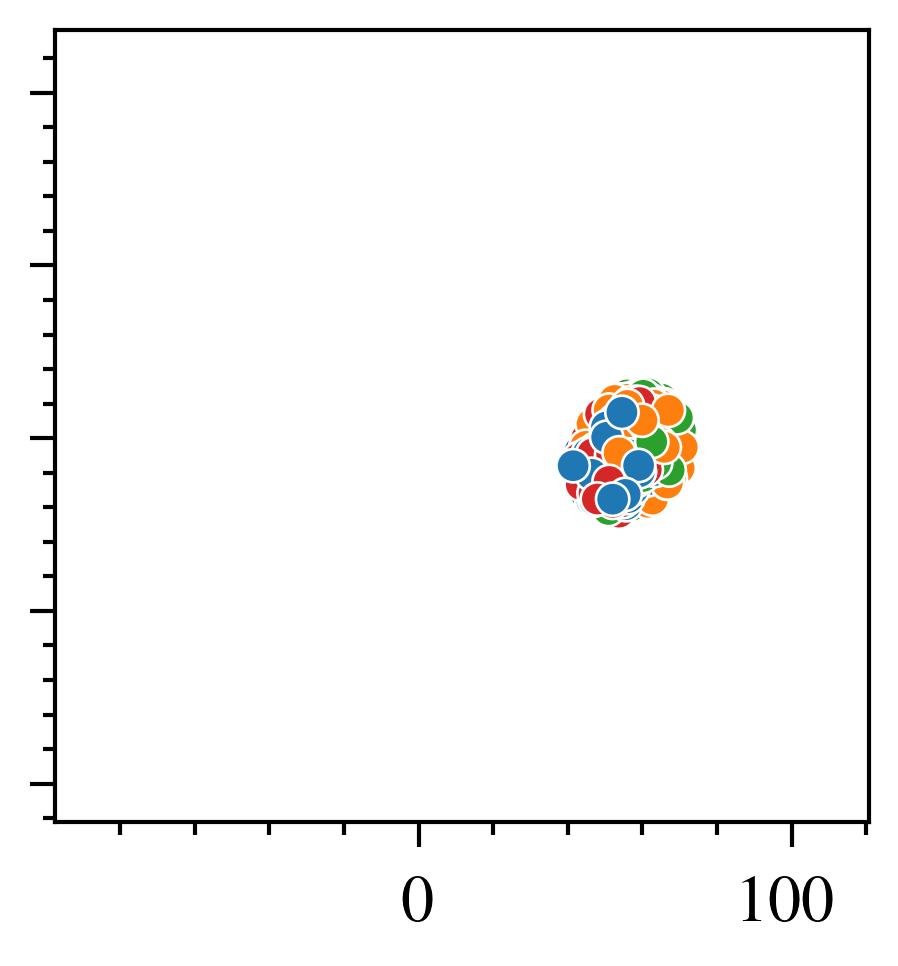

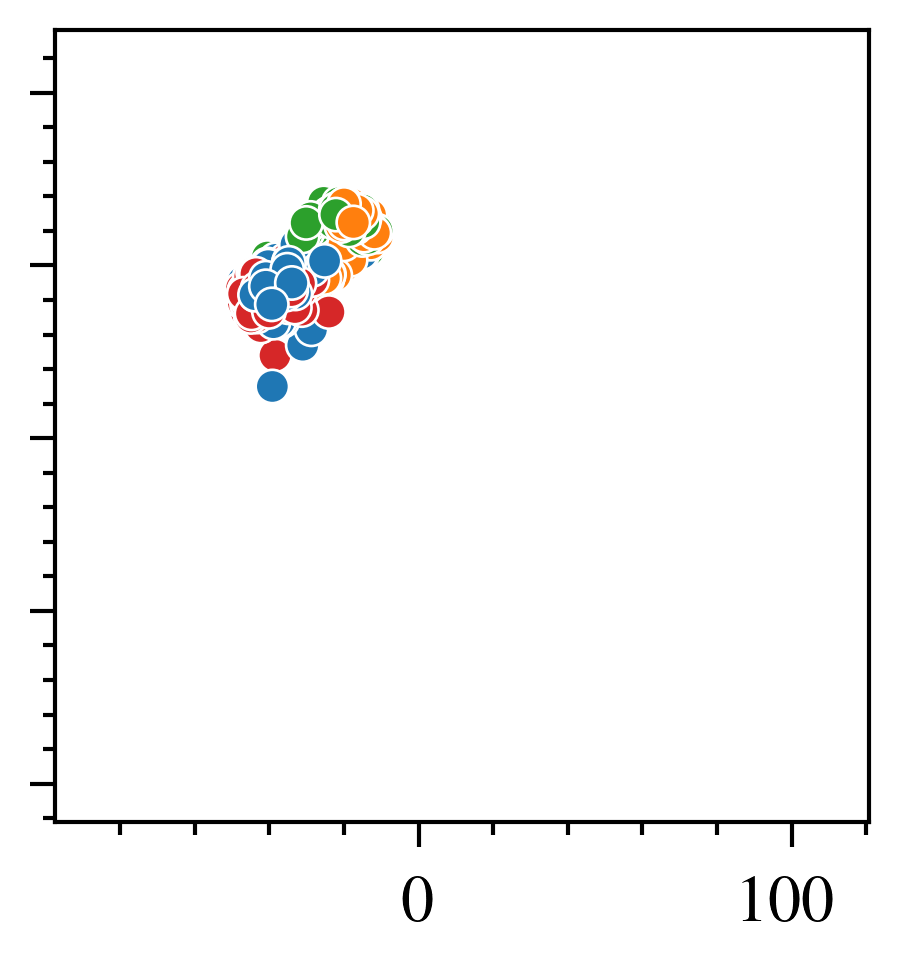

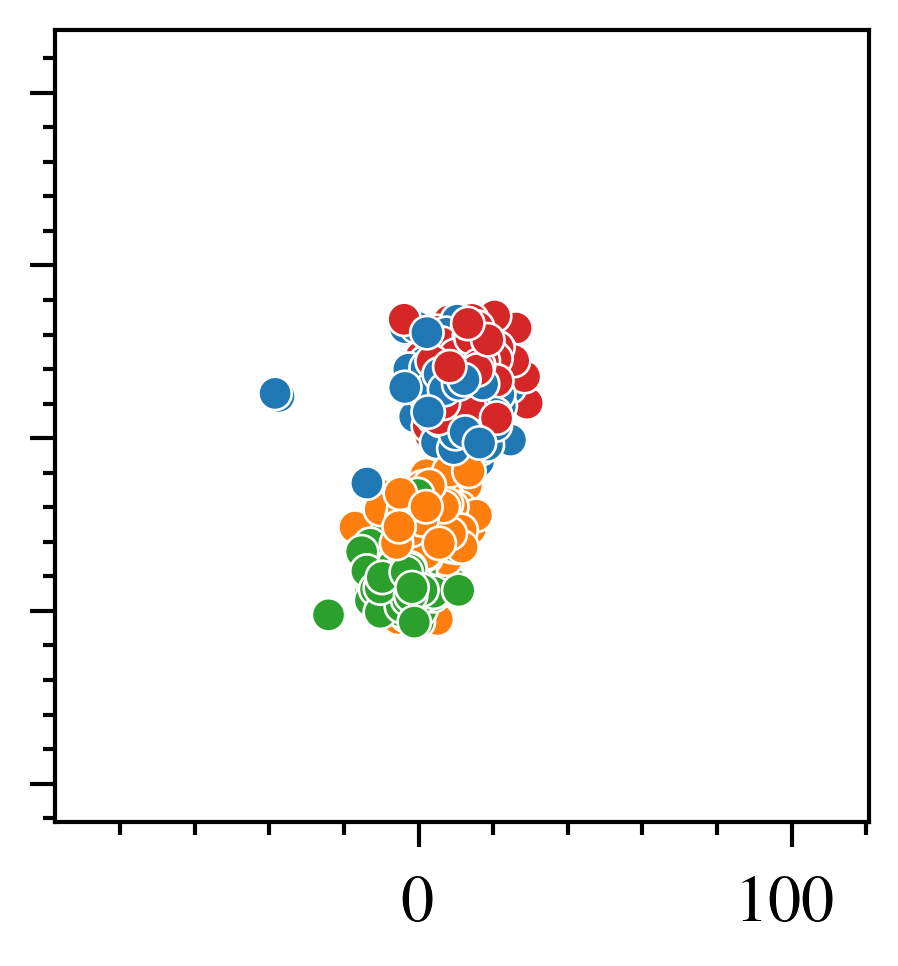

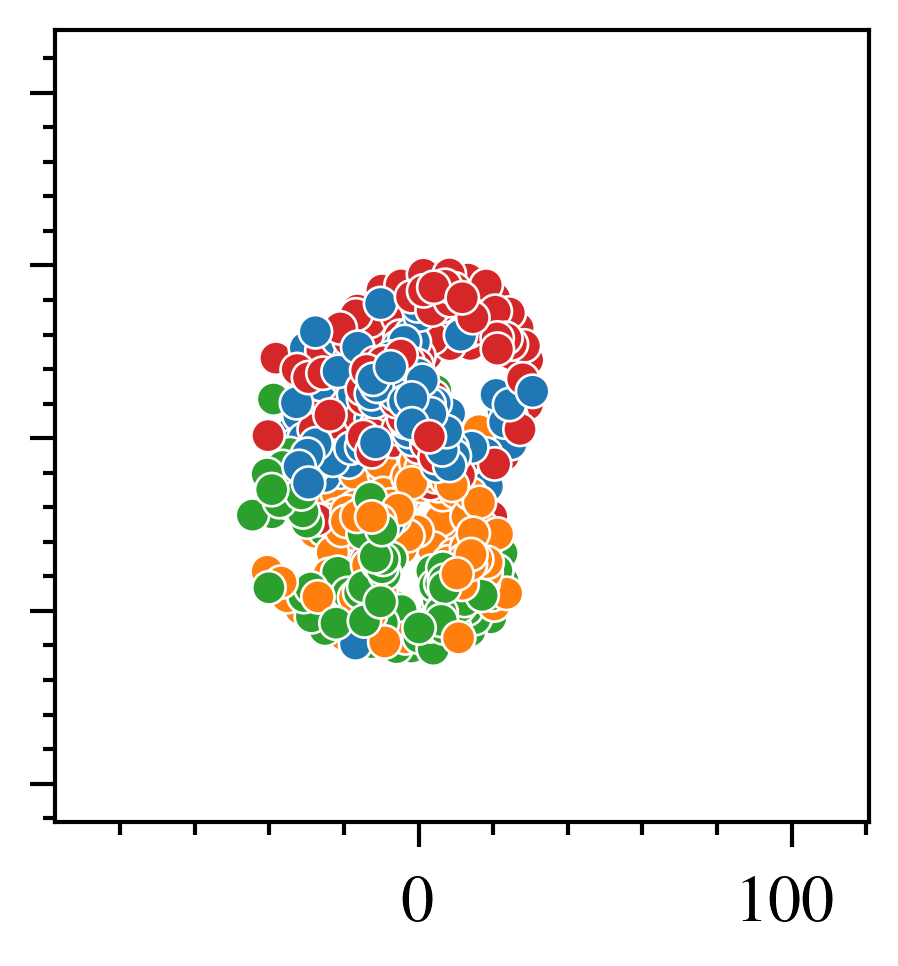

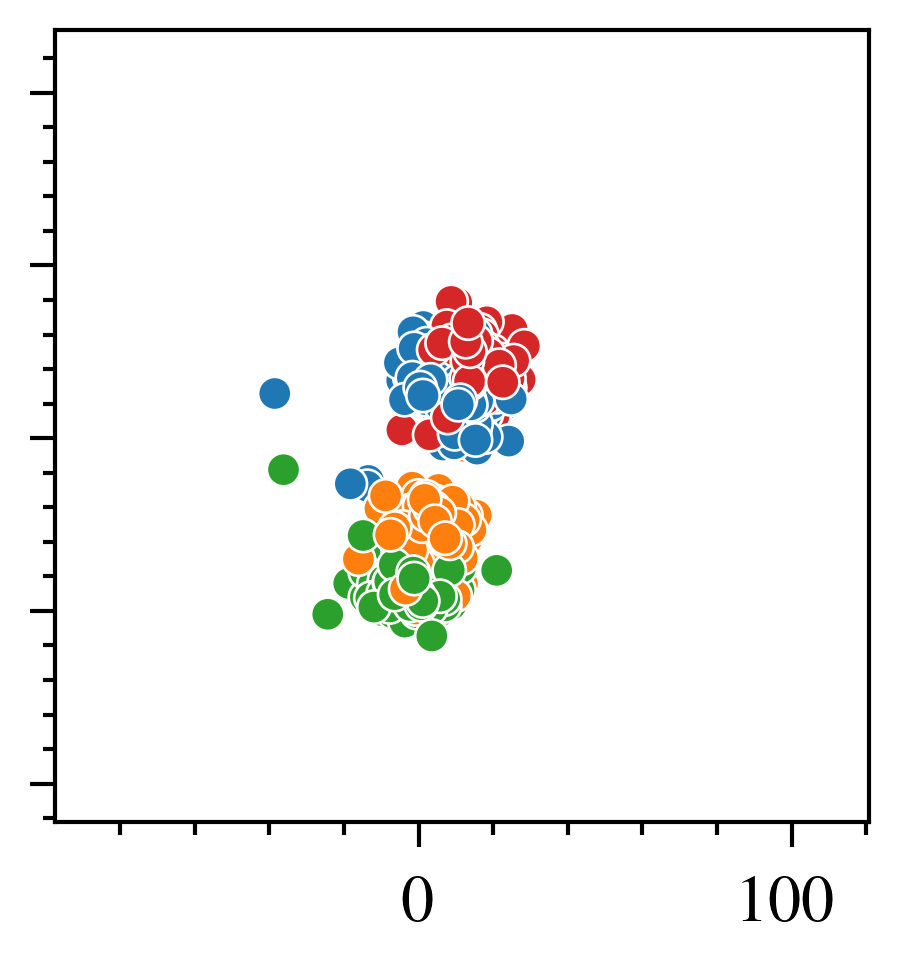

In [9]:
names = sorted(list(set(N)))
for i, name in enumerate(names):
    print(name)
    fig, ax = plt.subplots(figsize=(1.75, 1.75))

    X_ = X_tsne[(N == name)]
    Y_ = Y_all[(N == name)]

    sns.scatterplot(
        x=X_[:, 0],
        y=X_[:, 1],
        hue=Y_,
        s=16,
        palette="tab10",
        ax=ax,
    )
    ax.set_xlim(np.min(X_tsne[:, 0]) - 50, np.max(X_tsne[:, 0]) + 50)
    ax.set_ylim(np.min(X_tsne[:, 1]) - 50, np.max(X_tsne[:, 1]) + 50)

    if name not in ["None", "amplitude-perturbation-15"]: # "sliding-window-x", "emd"
        ax.set_yticklabels([])
    
    order = [1, 2, 0, 3]
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        [handles[idx] for idx in order],
        [["Left hand", "Right hand", "Feet", "Tongue"][idx] for idx in order],
        ncol=2,
        handletextpad=-0.25,
        columnspacing=0.0,
        loc="upper center"
    )
    if name != "None":
        ax.get_legend().remove()

    fig.savefig(f"../data/da/dd_2b_{name}.pdf", bbox_inches="tight")